# Flights Data Exploration
## by Abdullah Al Ajjan

## Investigation Overview

In this investigation, I studied the delay of flights in the U.S. and find the reasons for the delay. Mainly how Covid 19 affected the flights in the U.S.

## Dataset Overview

The dataset is a combination of two datasets one that contains all the flights in April 2019 and the other is of April 2020. This combination resulted in more than 260,000 flights that encountered an issue like a delay in flight, cancellation or a divertion.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load the two datasets
df19 = pd.read_csv('2019.csv')
df20 = pd.read_csv('2020.csv')

In [3]:
# filling all Nan in the Delay, cancelled, and diverted column with 0
df19["ARR_DEL15"] = df19["ARR_DEL15"].fillna(0)
df19["CANCELLED"] = df19["CANCELLED"].fillna(0)
df19["DIVERTED"] = df19["DIVERTED"].fillna(0)
df20["ARR_DEL15"] = df20["ARR_DEL15"].fillna(0)
df20["CANCELLED"] = df20["CANCELLED"].fillna(0)
df20["DIVERTED"] = df20["DIVERTED"].fillna(0)

In [4]:
# creating a new column to keep only the flights that encountered an issue
df19['TO_STUDY'] = df19["ARR_DEL15"] + df19["CANCELLED"] + df19["DIVERTED"]
df20['TO_STUDY'] = df20["ARR_DEL15"] + df20["CANCELLED"] + df20["DIVERTED"]

In [5]:
# keeping only the flights that encountered an issue
df19 = df19[df19['TO_STUDY']!=0]
df20 = df20[df20['TO_STUDY']!=0]

In [6]:
# no need for the below columns
df19.drop('TO_STUDY', axis = 1 , inplace=True)
df19.drop('Unnamed: 23', axis = 1 , inplace=True)
df20.drop('TO_STUDY', axis = 1 , inplace=True)
df20.drop('Unnamed: 23', axis = 1 , inplace=True)

In [7]:
# Adding the 2 data sets to each other forming a new dataframe
df = pd.concat([df19, df20],ignore_index=True)

In [8]:
# changing the date from string format to a date format
df.FL_DATE = pd.to_datetime(df.FL_DATE)

In [9]:
# change the name of the column to a new one that looks like the other columns
df.rename(columns={"ARR_DEL15": "DELAYED"}, inplace=True)

In [10]:
# joining the three columns (DELAYED, CANCELLED, DIVERTED) into one column (ISSUE_TYPE)
df = pd.melt(df, id_vars=['YEAR', 'MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER','ORIGIN', 'ORIGIN_STATE_NM', 'DEST', 'DEST_STATE_NM', 'CRS_DEP_TIME','DEP_TIME','DEP_DELAY_NEW','CRS_ARR_TIME' , 'ARR_TIME' , 'ARR_DELAY_NEW' , 'CARRIER_DELAY' , 'WEATHER_DELAY', 'NAS_DELAY' , 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
                           var_name='ISSUE_TYPE')

In [11]:
# Removing excess rows
df = df[df['value']!=0]

In [12]:
# no need for the value column anymore
df.drop('value', axis = 1 , inplace=True)

## How were the issues the flights encountered distributed over April 2019 and April 2020?

The flights with issued were uniformly spread with some peaks in 2019 yet they were decreasing in 2020.

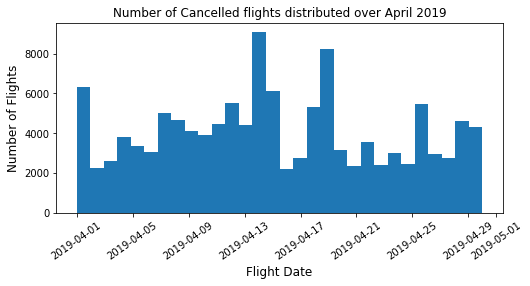

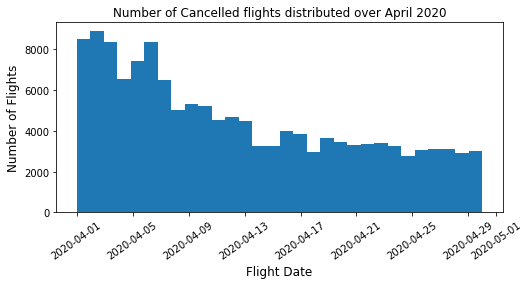

In [13]:
plt.figure(figsize=[8, 3.5])
plt.hist(data = df[df.YEAR==2019], x = 'FL_DATE', bins=30)
plt.xlabel('Flight Date', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.title('Number of Cancelled flights distributed over April 2019')
plt.xticks(rotation=35)
plt.show()

plt.figure(figsize=[8, 3.5])
plt.hist(data = df[df.YEAR==2020], x = 'FL_DATE', bins=30)
plt.xlabel('Flight Date', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.title('Number of Cancelled flights distributed over April 2020')
plt.xticks(rotation=35)
plt.show();


## How much time do flights usually delay?

Most delays are between 15 mins and an hour yet there are certain delays which are much more.

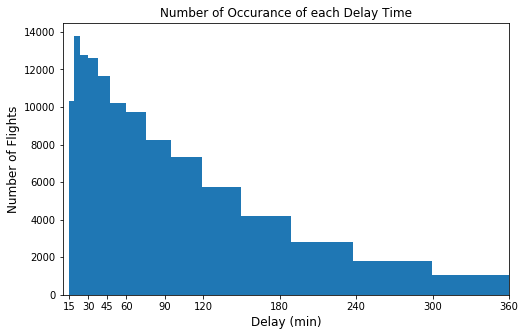

In [14]:
bins = 10 ** np.arange(np.log10(15), np.log10(360)+0.1, 0.1)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'ARR_DELAY_NEW', bins=bins)
plt.xlim(10, 360)
plt.xlabel('Delay (min)', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.title ('Number of Occurance of each Delay Time')
tick_locs=[15,30,45,60,90,120,180,240,300,360]
plt.xticks(tick_locs)
plt.show();

## Watch out travelers the below Airports are the ones that the flights mostly divert from.

Flights heading to Dallas, Chicago, Charlotte, Atlanta, Denver, Pheonix, Las Vegas, Queens, Los Angeles, and Houston are most likely to be diverted. So if you're going to any of the above be prepared you might see yourself in another state.



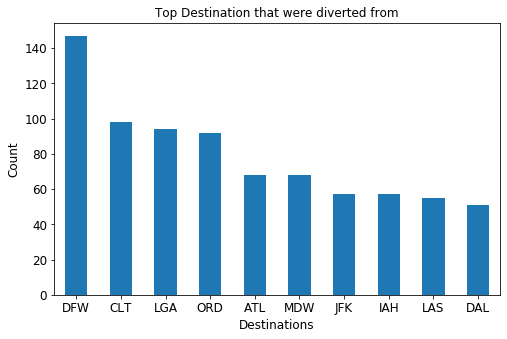

In [15]:
df_diverted = df[df['ISSUE_TYPE']== 'DIVERTED']
DESTDIV= df_diverted.DEST.value_counts(ascending = False).head(10)
DESTDIV.plot(kind='bar', figsize=(8,5), label= 'count' ,rot=0, fontsize=12)
plt.title('Top Destination that were diverted from')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Destinations', fontsize=12);

## With all these Travel Restrictions due to the pandemic how did the airplanes managed to complete their flights?

We Can see that the number of cancelled flights in 2020 is much higher than that in 2019 this is mainly due to the lockdown all over the United States.

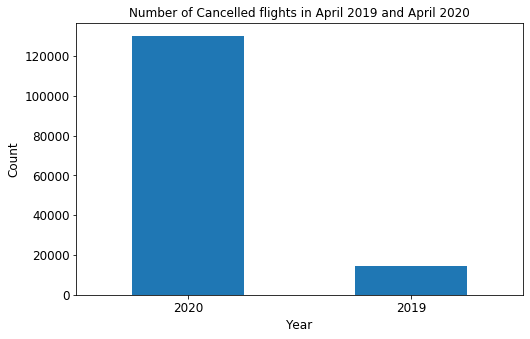

In [16]:
CANCELLED_FLIGHTS = df[df['ISSUE_TYPE']=='CANCELLED'].YEAR.value_counts()
CANCELLED_FLIGHTS.plot(kind='bar', figsize=(8,5), label= 'count' ,rot=0, fontsize=12)

plt.title('Number of Cancelled flights in April 2019 and April 2020')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12);

## Now let's see which carriers are on time.

JetBlue and Endeavor Air have the highest median and ones of the highest Q3, Express Jet is right net to them as well. So, we can say that these three carriers are the ones who get the most delayed time.

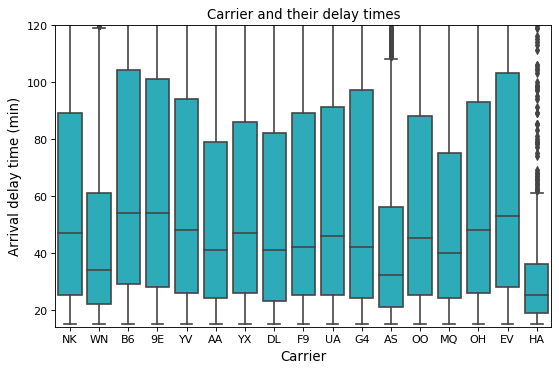

In [17]:
base_color = sb.color_palette()[9]
plt.figure(figsize=(8, 5), dpi=80)
sb.boxplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'ARR_DELAY_NEW', color = base_color)
plt.title('Carrier and their delay times')
plt.ylabel('Arrival delay time (min)', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.ylim(14, 120);

## Does the date and time of travel actually have any effect on whether a flight will get delayed or not?

We can notice that there is a very small correlation between the delay and the day of week, year, and the departure time. So don't get supersticous you can go on whatever day whenever time you want.

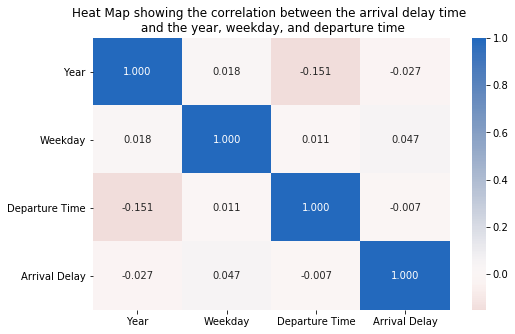

In [18]:
NUMVARS = ['YEAR', 'DAY_OF_WEEK', 'CRS_DEP_TIME' , 'ARR_DELAY_NEW']
plt.figure(figsize = [8, 5])
ax = sb.heatmap(df[NUMVARS].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
ax.set_xticklabels(['Year','Weekday','Departure Time', 'Arrival Delay'])
ax.set_yticklabels(['Year','Weekday','Departure Time', 'Arrival Delay'])
ax.set_title('Heat Map showing the correlation between the arrival delay time \n and the year, weekday, and departure time')
plt.show();

## Now let's find how did the pandemic affect the flights in all possible aspects.

Comparing between 2019 and 2020, in overall the delay time for most of the carriers in 2019 was more than in 2020. Yet, the carrier delay time and security delay time was more in 2020 than 2019 this is probably due to all the procedures that should be taken due to the pandemic.

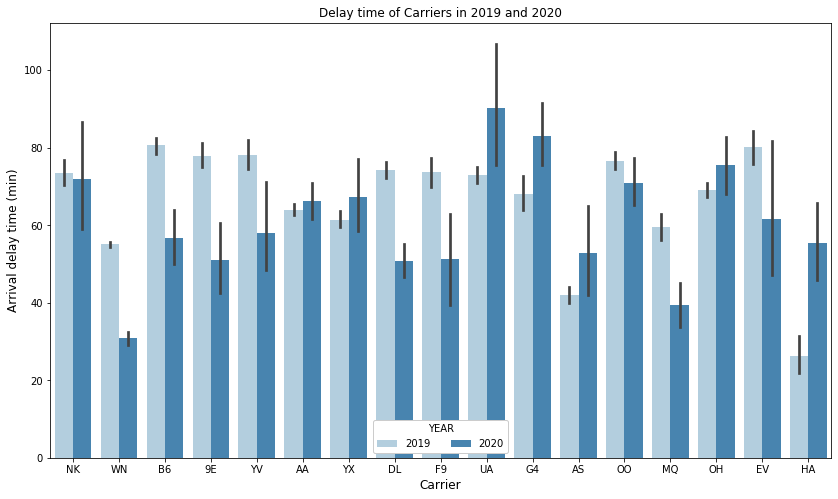

In [19]:
plt.figure(figsize = [14, 8])
sb.barplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'DEP_DELAY_NEW', hue = 'YEAR', palette = 'Blues')
plt.title('Delay time of Carriers in 2019 and 2020')
plt.ylabel('Arrival delay time (min)', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.legend(loc = 8, ncol = 3, framealpha = 1, title = 'YEAR');


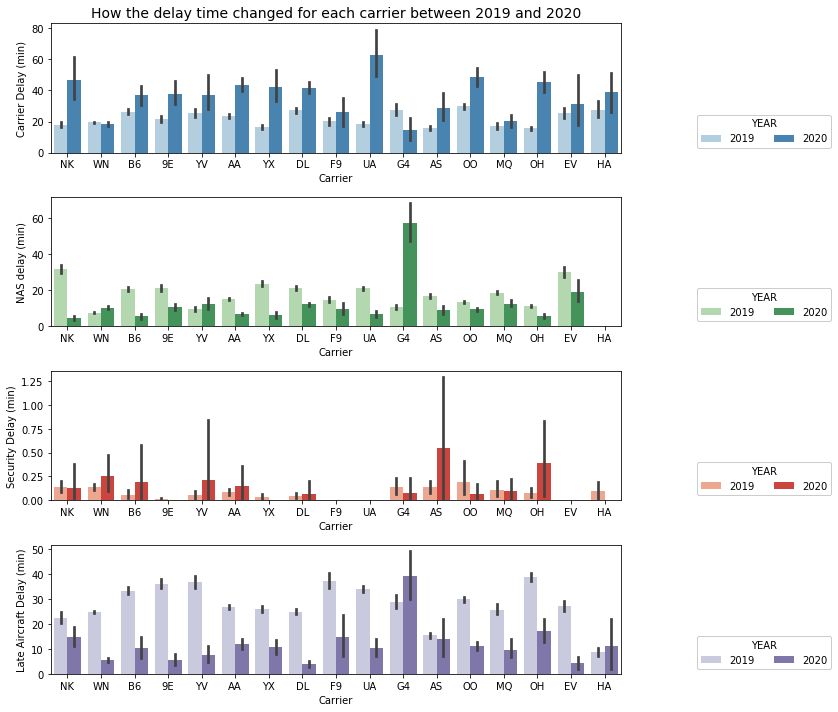

In [20]:
plt.figure(figsize = [12, 10])

plt.subplot(4, 1, 1)
ax = sb.barplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'CARRIER_DELAY', hue = 'YEAR', palette = 'Blues')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'YEAR',bbox_to_anchor=(1, 0, 0.5, 0.8))
ax.set_ylabel('Carrier Delay (min)')
ax.set_xlabel('Carrier')
plt.title('How the delay time changed for each carrier between 2019 and 2020', fontsize=14)

plt.subplot(4, 1, 2)
ax = sb.barplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'NAS_DELAY', hue = 'YEAR', palette = 'Greens')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'YEAR',bbox_to_anchor=(1, 0, 0.5, 0.8))
ax.set_ylabel('NAS delay (min)')
ax.set_xlabel('Carrier')

plt.subplot(4, 1, 3)
ax = sb.barplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'SECURITY_DELAY', hue = 'YEAR', palette = 'Reds')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'YEAR',bbox_to_anchor=(1, 0, 0.5, 0.8))
ax.set_ylabel('Security Delay (min)')
ax.set_xlabel('Carrier')

plt.subplot(4, 1, 4)
ax = sb.barplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'LATE_AIRCRAFT_DELAY', hue = 'YEAR', palette = 'Purples')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'YEAR', bbox_to_anchor=(1, 0, 0.5, 0.8))
ax.set_ylabel('Late Aircraft Delay (min)')
ax.set_xlabel('Carrier')
plt.tight_layout();
